In [24]:
import tensorflow as tf

In [25]:
# define Constants
batch_size = 128 
num_classes = 10 
epochs = 100

In [26]:
# load mnist data, split between train and test sets
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape:  (60000, 28, 28)
60000 train samples
10000 test samples


In [27]:
# convert class vectors to binary class metrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [28]:
# build the tf.keras.Sequential model by stacking layers.
# https://www.tensorflow.org/tutorials/quickstart/beginner
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
# save the best model as digits_model.h5
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint('digits_model.h5', save_best_only=True)

In [30]:
# define a callback to monitor val_loss
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [31]:
# train the model using the early stopping callback
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, callbacks=[monitor_val_lose, modelCheckpoint])

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4037 - accuracy: 0.8845 - val_loss: 0.1973 - val_accuracy: 0.9419
Epoch 2/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1959 - accuracy: 0.9429 - val_loss: 0.1430 - val_accuracy: 0.9580
Epoch 3/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1475 - accuracy: 0.9568 - val_loss: 0.1134 - val_accuracy: 0.9655
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1199 - accuracy: 0.9652 - val_loss: 0.1017 - val_accuracy: 0.9706
Epoch 5/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1014 - accuracy: 0.9697 - val_loss: 0.0915 - val_accuracy: 0.9723
Epoch 6/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0893 - accuracy: 0.9736 - val_loss: 0.0848 - val_accuracy: 0.9740
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9761 - val_loss: 0.0799 - val_accuracy: 0.9768

313/313 - 0s - loss: 0.0719 - accuracy: 0.9809


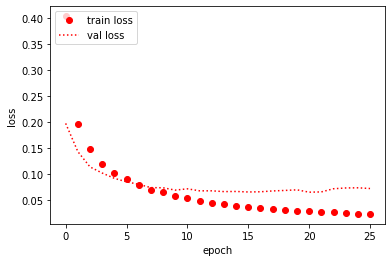

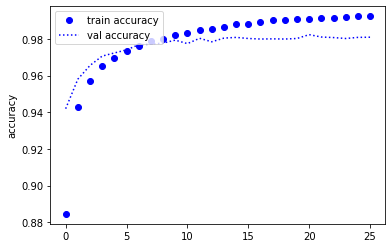

In [32]:
# show history
model.evaluate(x_test, y_test, verbose=2)

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r:', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'bo', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'b:', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [33]:
# predict model
import numpy as np
selected_digit = 0

result = model.predict(np.array([x_test[selected_digit]]))
result_number = np.argmax(result)
y_test_digit = y_test[selected_digit]
y_test_number = np.argmax(y_test_digit)
print(result, result_number)
print(y_test_digit, y_test_number)

[[6.2507632e-10 2.7175522e-11 9.2256034e-09 3.0200659e-05 2.4264231e-14
  1.6645669e-09 2.2101399e-17 9.9996984e-01 1.0191808e-08 3.0876699e-08]] 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7


[6.250763e-10, 2.7175522e-11, 9.225603e-09, 3.020066e-05, 2.4264231e-14, 1.6645669e-09, 2.2101399e-17, 0.99996984, 1.0191808e-08, 3.08767e-08]


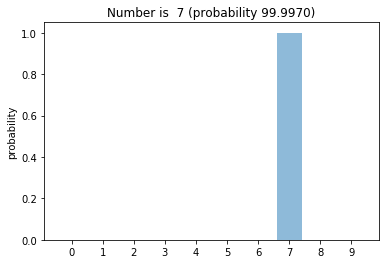

In [35]:
# show predicted number
digits = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
y_pos = np.arange(len(digits))
performance = [ val for val in result[0]]
print(performance)
result_probability = performance[result_number]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, digits)
plt.ylabel('probability')
plt.title('Number is %2i (probability %7.4f)' % (result_number, result_probability*100))

plt.show()

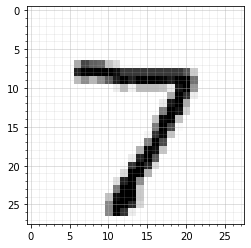

In [37]:
# draw digit image
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# major ticks every 20, minor ticks every 5
major_ticks = np.arange(0,29,5)
minor_ticks = np.arange(0,29,1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# and a corresponding grid
ax.grid(which='both')

# or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.imshow(x_test[selected_digit], cmap=plt.cm.binary)

plt.show()

In [38]:
print(x_test[selected_digit])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    